In [1]:
import pandas as pd
import datetime
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro

## 定数の設定

分析全体を通して使う定数は大文字で定義しておくのがルール。

In [2]:
# https://www.quandl.com/api/v3/datasets/TSE/{code}/data.csv

SHARES = ["TSE-1662", "TSE-8267", "TSE-7203", "TSE-9020"]
# SHARES = ["TSE-1662", "TSE-1605", "TSE-8267", "TSE-7203", "TSE-9020"]

START = datetime.datetime(2017,1,1)
END = datetime.datetime(2018,1,1)

## 読み込み・前処理

必要なカラム、期間を絞って使いやすい形のデータフレームにする。

In [3]:
for i, s in enumerate(SHARES):
    data = pd.read_csv(f'{s}.csv')
    data['Date'] = pd.to_datetime(data['Date'])
    cond = (data['Date'] >= START) & (data['Date'] < END)    
    if i == 0: 
        df = data[cond].sort_values('Date', ascending=True).set_index('Date')[['Close']]
        df = df.rename(columns={"Close":f"{s}"})
    else:
        df[s] = data[cond].sort_values('Date', ascending=True).set_index('Date')['Close']

In [4]:
df.head()

,TSE-1662,TSE-8267,TSE-7203,TSE-9020
Date,,,,
2017-01-04,2672.0,1684.0,7097.0,10320.0
2017-01-05,2645.0,1698.5,7049.0,10375.0
2017-01-06,2632.0,1699.5,6930.0,10510.0
2017-01-10,2586.0,1688.0,6861.0,10400.0
2017-01-11,2596.0,1699.0,6912.0,10495.0


## データ可視化あれこれ

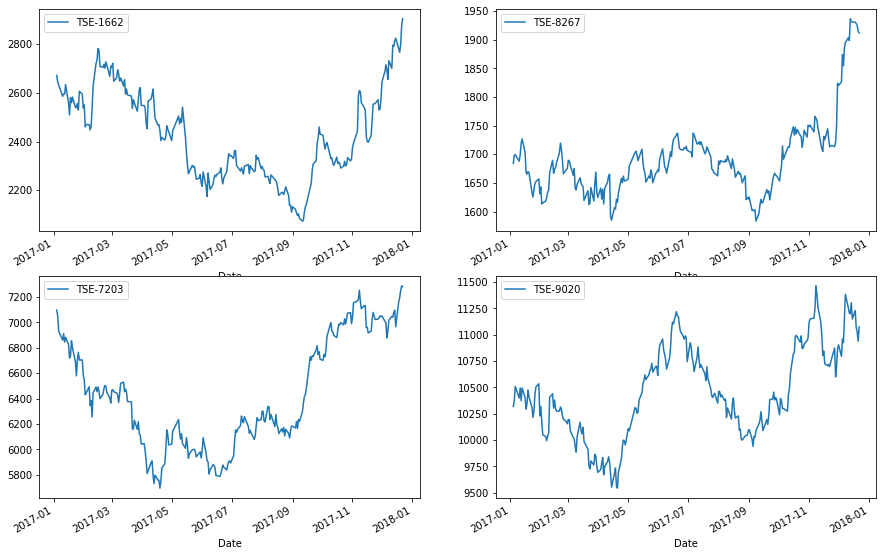

In [5]:
# そのまま
plt.figure(figsize=(15,10))
for i, s in enumerate(SHARES):
    plt.subplot(2,2,i+1)
    df[s].plot(label=s)
    plt.legend()

plt.show()

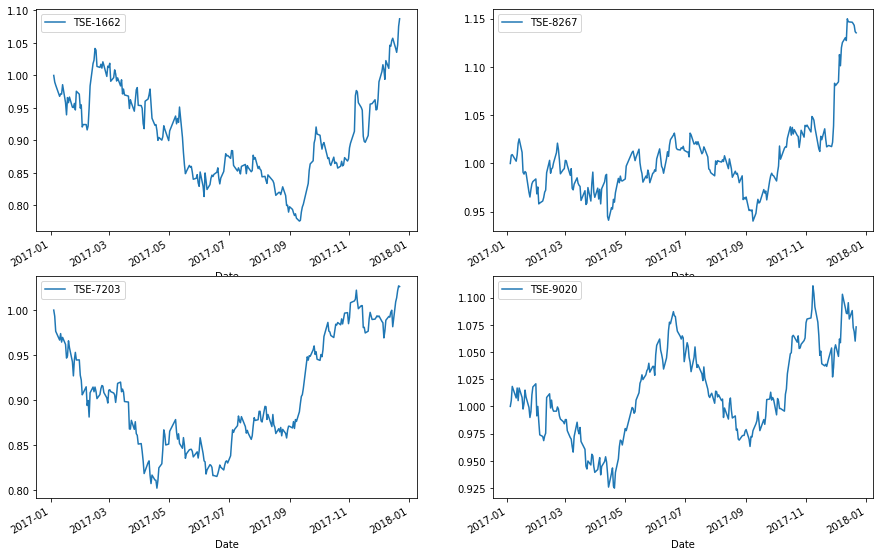

In [6]:
# スケール調整
plt.figure(figsize=(15,10))
for i, s in enumerate(SHARES):
    plt.subplot(2,2,i+1)
    (df[s] / df[s].iloc[0]).plot(label=s)
    plt.legend()
plt.show()

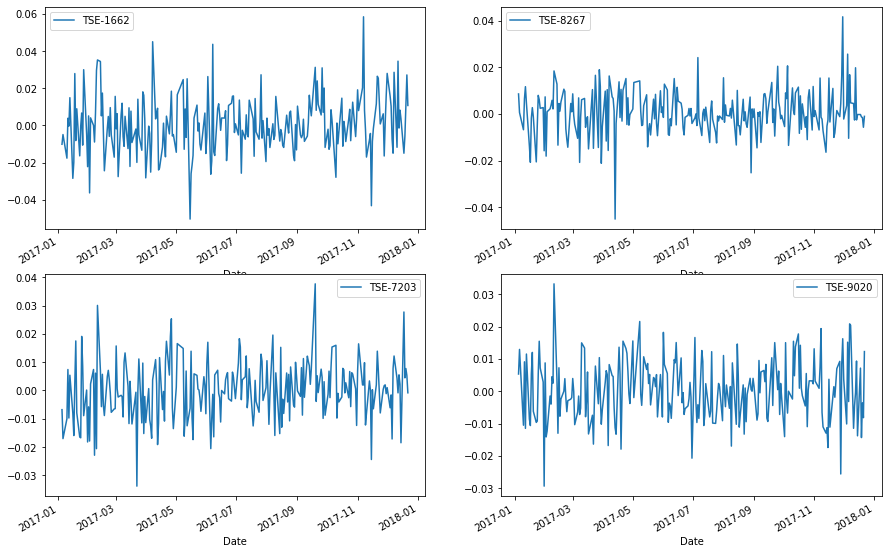

In [7]:
# 対数変化率
plt.figure(figsize=(15,10))
for i, s in enumerate(SHARES):
    plt.subplot(2,2,i+1)
    (np.log(df[s])).diff().plot(label=s)
    plt.legend()
plt.show()

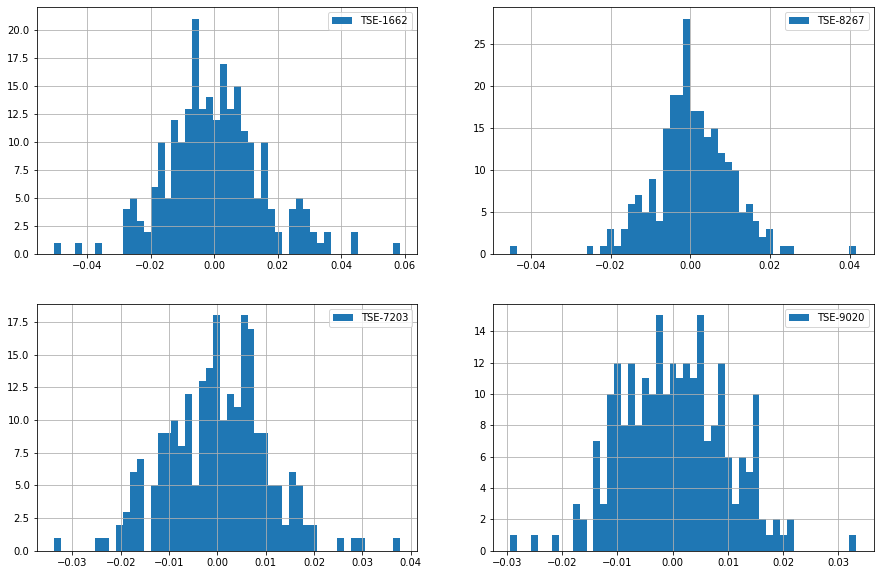

In [8]:
# 対数変化率(hist)
plt.figure(figsize=(15,10))
for i, s in enumerate(SHARES):
    plt.subplot(2,2,i+1)
    (np.log(df[s])).diff().hist(label=s, bins=50)
    plt.legend()
plt.show()

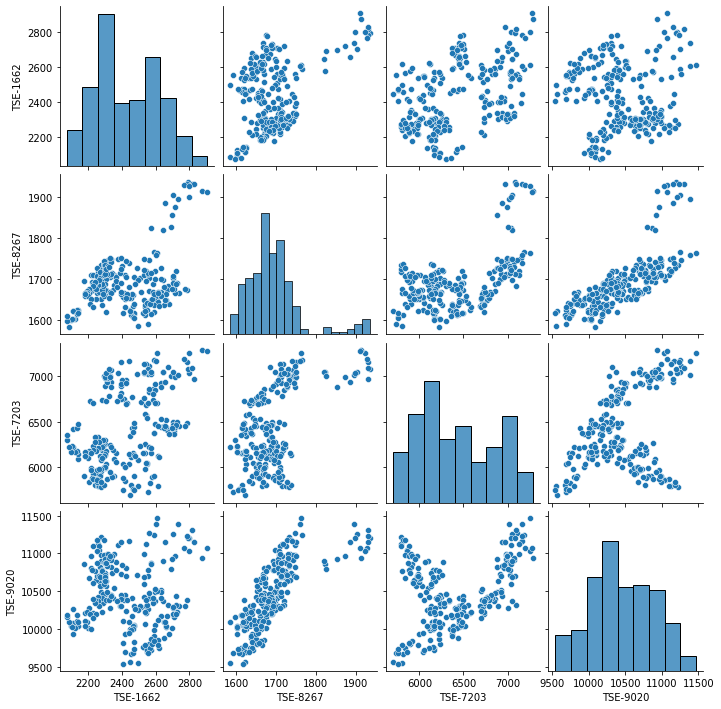

In [9]:
sns.pairplot(df)

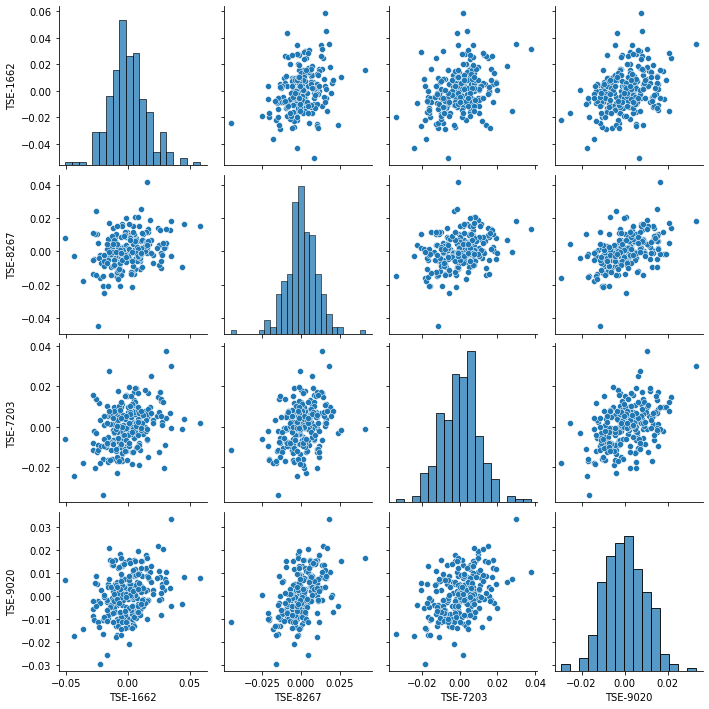

In [10]:
sns.pairplot(np.log(df).diff())

## 各種統計量

In [11]:
# 価格の統計量 
df.describe()

,TSE-1662,TSE-8267,TSE-7203,TSE-9020
count,242.000000,242.000000,242.000000,242.000000
mean,2431.595041,1692.268595,6425.685950,10456.012397
std,188.443552,68.619903,432.205692,433.968816
min,2073.000000,1583.500000,5695.000000,9544.000000
25%,2281.000000,1651.625000,6096.500000,10127.500000
50%,2414.000000,1680.250000,6353.500000,10405.000000
75%,2579.500000,1713.875000,6840.500000,10802.500000
max,2905.000000,1936.500000,7288.000000,11465.000000


In [12]:
# 銘柄間の価格の相関係数
df.corr()

,TSE-1662,TSE-8267,TSE-7203,TSE-9020
TSE-1662,1.000000,0.406274,0.440247,-0.002744
TSE-8267,0.406274,1.000000,0.549450,0.751709
TSE-7203,0.440247,0.549450,1.000000,0.425467
TSE-9020,-0.002744,0.751709,0.425467,1.000000


In [13]:
# 対数収益率の統計量 
np.log(df).diff().describe()

,TSE-1662,TSE-8267,TSE-7203,TSE-9020
count,241.000000,241.000000,241.000000,241.000000
mean,0.000347,0.000527,0.000107,0.000293
std,0.015425,0.009765,0.010315,0.009392
min,-0.050424,-0.045148,-0.033831,-0.029378
25%,-0.008947,-0.004996,-0.006786,-0.006773
50%,-0.000385,-0.000259,0.000167,0.000000
75%,0.008857,0.006571,0.006841,0.006421
max,0.058454,0.041702,0.037706,0.033222


## 正規性検定

In [14]:
alpha = 0.05
for i, s in enumerate(SHARES):
    print(f"----{s}----")
    stat_value, p_value = shapiro(np.log(df[s]).diff()[1:])
    if p_value < alpha:
        print(f'Reject H0, looks not gaussian: stat={stat_value}, p={p_value}')
    else:
        print(f'Faild to reject H0, looks gaussian: stat={stat_value}, p={p_value}')


----TSE-1662----
Reject H0, looks not gaussian: stat=0.9871060848236084, p=0.028845276683568954
----TSE-8267----
Reject H0, looks not gaussian: stat=0.9752605557441711, p=0.0003231317095924169
----TSE-7203----
Faild to reject H0, looks gaussian: stat=0.9925945401191711, p=0.2708719074726105
----TSE-9020----
Faild to reject H0, looks gaussian: stat=0.994530975818634, p=0.5373579859733582
